<img src = 'https://upload.wikimedia.org/wikipedia/commons/5/51/IBM_logo.svg?raw=true' width="240" height="360">
 
# CFC Project  


Project overview:

      The covid-19 having some many variants are now a day. The most part is to take covid-19 vaccine as early as possible. The most important part is that the number vaccine have taken are unknown to city. To overcome the issue building a model to prediction to take to covid-19 vaccine as soon as possible by a person.



### Table of Content

1. [Problem Statement](#section1)<br>
2. [Importing Packages](#section2)<br>
3. [Loading Data](#section3)<br>
  - 3.1 [Description of the Datasets](#section301)<br>
4. [Data Preprocessing](#section4)<br>
5. [Exploratory Data Analysis](#section5)<br>
6. [The Model](#section6)<br>
  - 6.1 [Build the Model](#section601)<br>
  - 6.2 [Inspect the Model](#section602)<br>
  - 6.3 [Train the Model](#section603)<br>
  - 6.4 [Make Predictions](#section604)<br>
7. [Model Tuning](#section7)<br>
8. [Conclusion](#section8)<br>

<a id=section1></a>
## 1. Problem Statement

   The **covid-19** having some many variants are now a day. The most part is to take covid-19 vaccine as early as possible. The most important part is that the number vaccine have taken are unknown to city. To overcome the issue building a model to prediction to take to covid-19 vaccine as soon as possible by a person.

<a id=section2></a>
## 2. Importing Packages

In [3]:
import numpy as np                     
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

## import pandas_profiling

from sklearn import metrics
import numpy as np
                                                                    # Allow plots to appear directly in the notebook
%matplotlib inline                                       
  
# importing alll the necessary packages to use the various classification algorithms

from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn import metrics # for checking the model accuracy
import tensorflow as tf
import kerastuner as kt
from tensorflow import keras
import tensorflow_docs as tfdocs
import tensorflow_docs.plots
import tensorflow_docs.modeling
from keras.utils import np_utils
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import confusion_matrix
from tensorflow.keras import models, layers
from kerastuner import HyperModel, RandomSearch, Hyperband, BayesianOptimization
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPool2D, BatchNormalization, Dropout, Flatten, LeakyReLU
from keras.callbacks import EarlyStopping



import warnings
warnings.filterwarnings("ignore")                   # To suppress all the warnings in the notebook.


Using TensorFlow backend.


<a id=section3></a>
## 3. Loading Data

### Importing Dataset

In [41]:
# Importing the DEFCON dataset using Pandas Dataframe.

Project1= pd.read_csv('https://raw.githubusercontent.com/Sanjibjena/CFC-Dataset/main/Dataset.csv')
Project = Project1.copy()
Project.head()

,Sl. No.,Age_Group (18 -44),Age_Group (45 - 60+),Male_Person,Female_Person,FirstName,LastName,State,City,Vaccination Dose1,Vaccination Dose2,Pre-existing health condition,Risk
0,1,1,0,1,0,Firstname 1,Lastname 1,karnataka,Bengaluru,1,0,1,3
1,2,0,1,0,1,Firstname 2,Lastname 2,Maharashtra,Pune,1,1,3,1
2,3,0,1,1,0,Firstname 3,Lastname 3,Maharashtra,Pune,1,0,1,2
3,4,1,0,1,0,Firstname 4,Lastname 4,Maharashtra,Pune,1,1,2,3
4,5,1,0,1,0,Firstname 5,Lastname 5,Maharashtra,Mumbai,1,1,3,3


<a id=section301></a>
### Description of the Dataset

- This dataset provides a **details** of covide information of vaccine taken or need to take on **Priority**. 


##- Detailed information about each ingredients column can be found at this [link](https://covid19.who.int/).


| Column Name                    | Description                                                                                |
| -------------------------------|:------------------------------------------------------------------------------------------:| 
|                                       |
| Age                            | Person's age.                                                                              |
                                                              


In [5]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sl. No.                        15 non-null     int64 
 1   Age_Group (18 -44)             15 non-null     int64 
 2   Age_Group (45 - 60+)           15 non-null     int64 
 3   Male_Person                    15 non-null     int64 
 4   Female_Person                  15 non-null     int64 
 5   FirstName                      15 non-null     object
 6   LastName                       15 non-null     object
 7   State                          15 non-null     object
 8   City                           15 non-null     object
 9   Vaccination Dose1              15 non-null     int64 
 10  Vaccination Dose2              15 non-null     int64 
 11  Pre-existing health condition  15 non-null     int64 
 12  Risk                           15 non-null     int64 
dtypes: int6

- ```info``` function gives us the following insights into the dataframe:

  - There are a total of **15 samples (rows)** and **13 columns** in the dataframe.
  
  - There are **1 columns** with a **numeric** datatype.
  - There are **12 columns** with a **object** datatype.
  - There are **0 missing** values in the data.

In [6]:
Project.shape

(15, 13)

In [7]:
# Checking any missing data

Project.isnull ().any()

Sl. No.                          False
Age_Group (18 -44)               False
Age_Group (45 - 60+)             False
Male_Person                      False
Female_Person                    False
FirstName                        False
LastName                         False
State                            False
City                             False
Vaccination Dose1                False
Vaccination Dose2                False
Pre-existing health condition    False
Risk                             False
dtype: bool

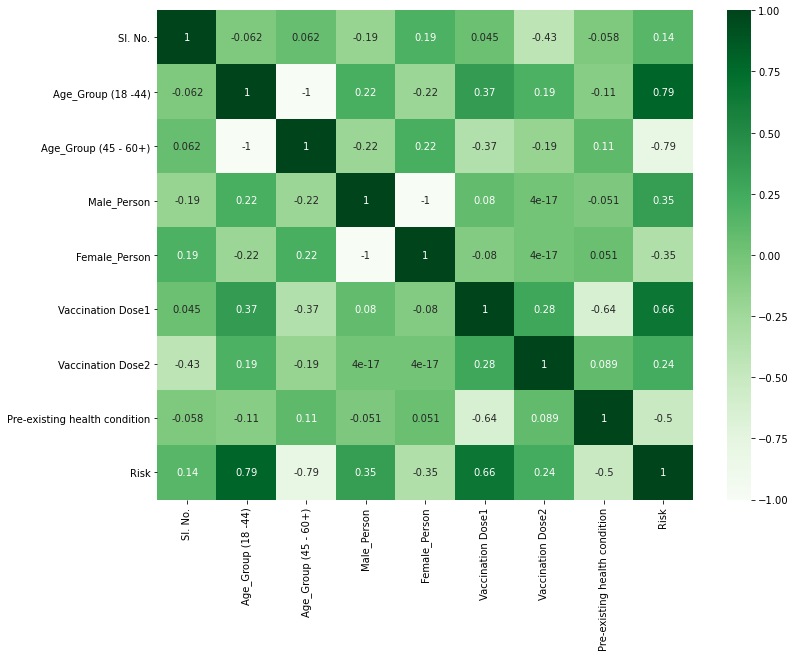

In [8]:
# Heatmap plot with values

correlation = Project.corr()
plt.figure (figsize = (12,9))
sns.heatmap(correlation, vmax=1, annot=True, linewidth=0, square=False, cmap ="Greens")
plt.show()

<a id=section4></a>
## 4. Data Preprocessing

<a id=section401></a>
### 4.1 Data Preprocessing

- Here we will perform **Data Preprocessing** on our dataset, to make the data usable for **EDA**.


In [9]:
Project.Risk.unique()

array([3, 1, 2], dtype=int64)

In [10]:
Project.Risk.value_counts()

3    8
2    4
1    3
Name: Risk, dtype: int64

In [1]:
# Risk value assign

# Project["Risk"].replace({"High": "1", "Moderate": "2", "Low": "3" }, inplace=True)

In [42]:
# Risk value assign

Project["Risk"].replace({"1": "High", "2": "Moderate", "3": "Low" }, inplace=True)

In [32]:
# Age Group (18 -44) value assign

#Project["Age Group (18 -44)"].replace({"Yes": "1", "No": "0" }, inplace=True)

In [36]:
# Age Group (45 - 60+) value assign

#Project["Age Group (45 - 60+)"].replace({"Yes": "1", "No": "0" }, inplace=True)

In [37]:
# Male value assign

#Project["Male Person"].replace({"Yes": "1", "No": "0" }, inplace=True)

In [38]:
# Female value assign

#Project["Female Person"].replace({"Yes": "1", "No": "0" }, inplace=True)

In [43]:
Project[Project['Age_Group (18 -44)'] >= 1]['Age_Group (18 -44)'].count()

7

In [44]:
Project['Age_Group (45 - 60+)'].count()

Project[Project['Age_Group (45 - 60+)'] >= 1]['Age_Group (45 - 60+)'].count()

8

In [45]:
# Project['Age_Group (45 - 60+)'].count()

In [46]:
#Project['Age_Group (18 -44)'].count()

In [47]:
sum = Project['Total_Persons'] = Project['Age_Group (18 -44)'] + Project['Age_Group (45 - 60+)']


In [48]:
Project['Total_Persons'].count()

15

In [49]:
Project.head()

,Sl. No.,Age_Group (18 -44),Age_Group (45 - 60+),Male_Person,Female_Person,FirstName,LastName,State,City,Vaccination Dose1,Vaccination Dose2,Pre-existing health condition,Risk,Total_Persons
0,1,1,0,1,0,Firstname 1,Lastname 1,karnataka,Bengaluru,1,0,1,3,1
1,2,0,1,0,1,Firstname 2,Lastname 2,Maharashtra,Pune,1,1,3,1,1
2,3,0,1,1,0,Firstname 3,Lastname 3,Maharashtra,Pune,1,0,1,2,1
3,4,1,0,1,0,Firstname 4,Lastname 4,Maharashtra,Pune,1,1,2,3,1
4,5,1,0,1,0,Firstname 5,Lastname 5,Maharashtra,Mumbai,1,1,3,3,1


In [52]:
Project.describe ()

,Sl. No.,Age_Group (18 -44),Age_Group (45 - 60+),Male_Person,Female_Person,Vaccination Dose1,Vaccination Dose2,Pre-existing health condition,Risk,Total_Persons
count,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.000000,15.0
mean,8.000000,0.466667,0.533333,0.600000,0.400000,0.866667,0.333333,2.266667,2.333333,1.0
std,4.472136,0.516398,0.516398,0.507093,0.507093,0.351866,0.487950,1.099784,0.816497,0.0
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.0
25%,4.500000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,1.000000,2.000000,1.0
50%,8.000000,0.000000,1.000000,1.000000,0.000000,1.000000,0.000000,2.000000,3.000000,1.0
75%,11.500000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,3.000000,1.0
max,15.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,4.000000,3.000000,1.0


In [55]:
# dropping Sl. No. column


Project.drop('Sl. No.', axis= 1, inplace=True)   ## Putting inplace=False 

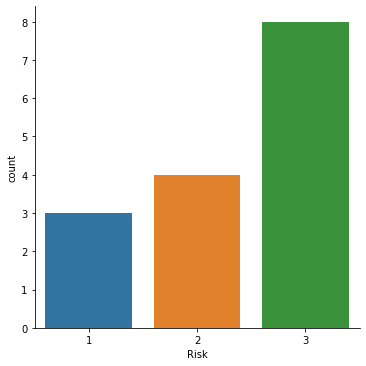

In [27]:
#The countplot function gives a countplot graph of desired attribute

sns.catplot (x='Risk',data=Project,kind='count')

In [28]:
Project.describe(include = 'all')

,Age_Group (18 -44),Age_Group (45 - 60+),Male_Person,Female_Person,FirstName,LastName,State,City,Vaccination Dose1,Vaccination Dose2,Pre-existing health condition,Risk,Total_Persons
count,15.000000,15.000000,15.000000,15.000000,15,15,15,15,15.000000,15.000000,15.000000,15.000000,15.0
unique,NaN,NaN,NaN,NaN,15,15,5,7,NaN,NaN,NaN,NaN,NaN
top,NaN,NaN,NaN,NaN,Firstname 7,Lastname 11,Maharashtra,Bengaluru,NaN,NaN,NaN,NaN,NaN
freq,NaN,NaN,NaN,NaN,1,1,6,4,NaN,NaN,NaN,NaN,NaN
mean,0.466667,0.533333,0.600000,0.400000,NaN,NaN,NaN,NaN,0.866667,0.333333,2.266667,2.333333,1.0
std,0.516398,0.516398,0.507093,0.507093,NaN,NaN,NaN,NaN,0.351866,0.487950,1.099784,0.816497,0.0
min,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,1.000000,1.000000,1.0
25%,0.000000,0.000000,0.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,1.000000,2.000000,1.0
50%,0.000000,1.000000,1.000000,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,2.000000,3.000000,1.0
75%,1.000000,1.000000,1.000000,1.000000,NaN,NaN,NaN,NaN,1.000000,1.000000,3.000000,3.000000,1.0


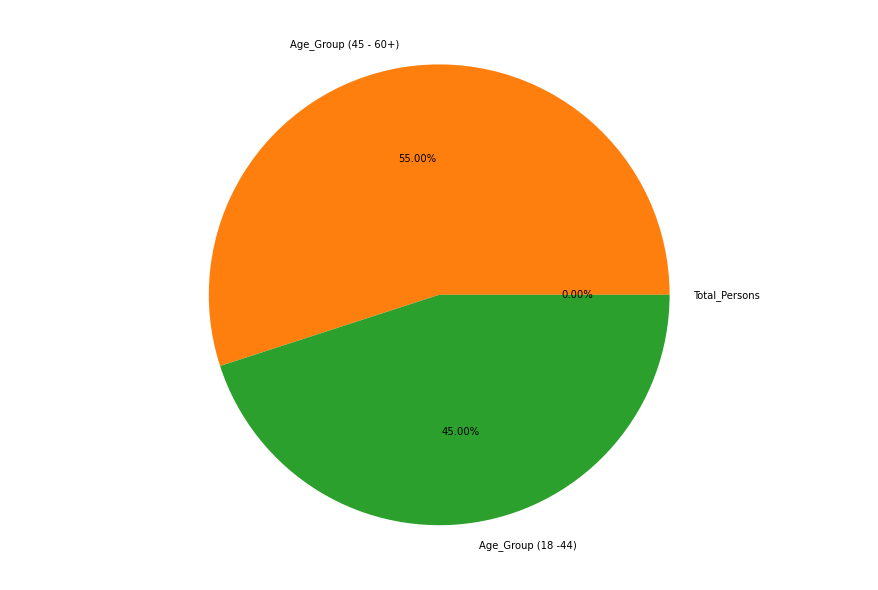

In [30]:
## Pie chart


fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.axis('equal')
l = ['Total_Persons', 'Age_Group (45 - 60+)', 'Age_Group (18 -44)']
s = [0,55,45]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

ValueError: The `markers` argument has the wrong number of values

<Figure size 432x288 with 0 Axes>

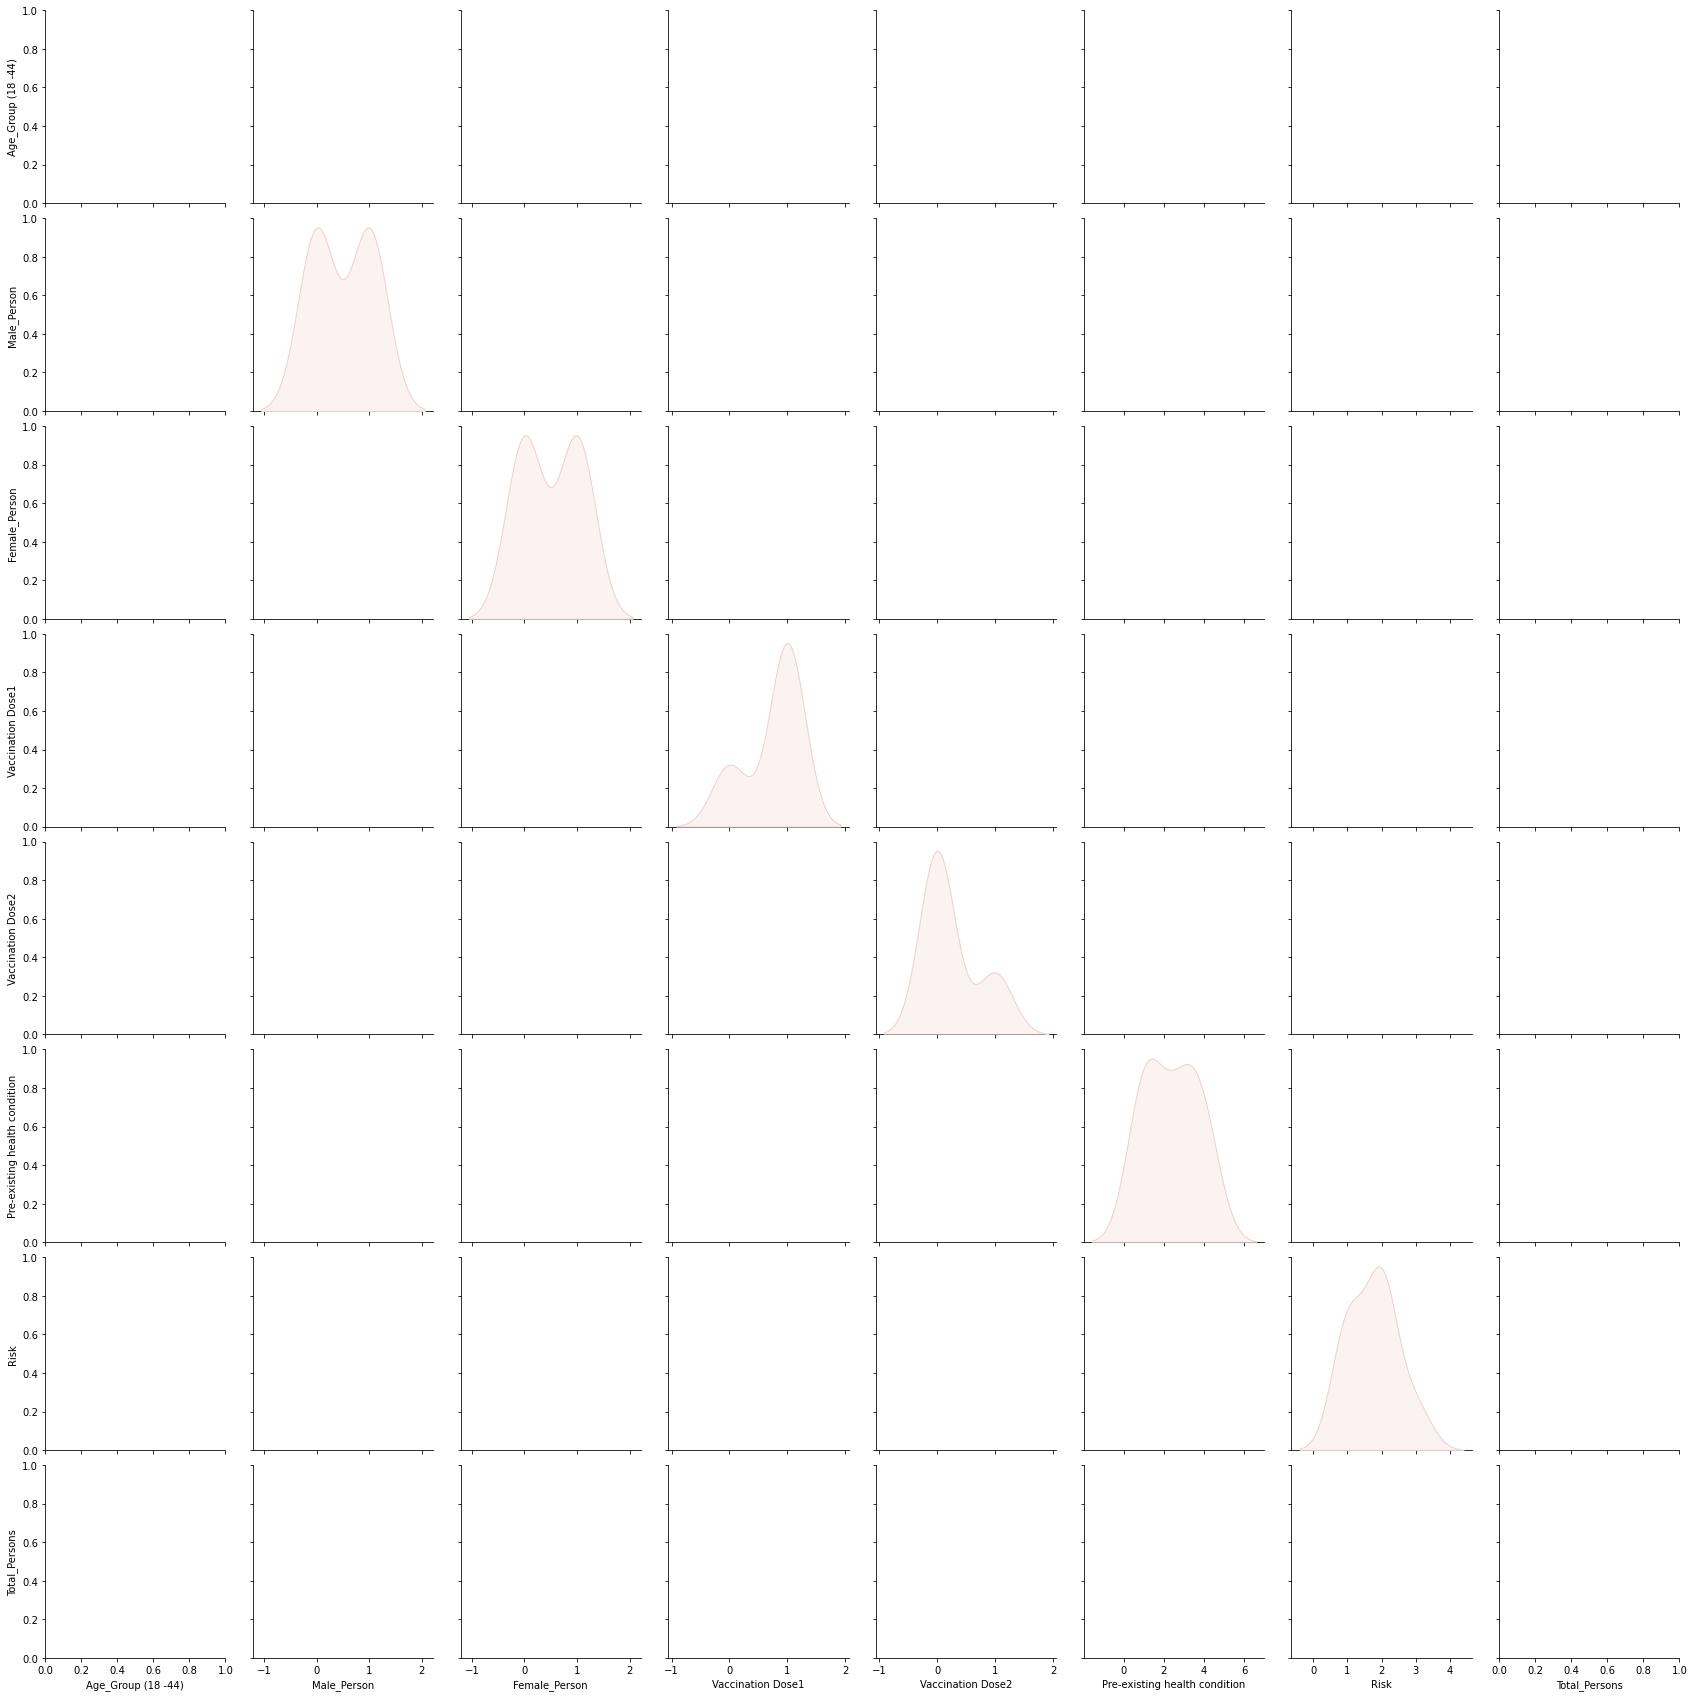

In [67]:
plt.figure()
sns.pairplot(Project, hue = "Age_Group (45 - 60+)", size=3, markers=["o", "s", "D"])
plt.show()

In [ ]:
## Pie chart


fig = plt.figure()
ax = fig.add_axes([0,0,2,2])
ax.axis('equal')
l = ['Versicolor', 'Setosa', 'Virgi']
s = [50,50,50]
ax.pie(s, labels = l,autopct='%1.2f%%')
plt.show()

In [50]:
# making boolean series for a team name


filter1 = Project["Age_Group (45 - 60+)"] >= 1

In [51]:
print(filter1)

0     False
1      True
2      True
3     False
4     False
5     False
6      True
7      True
8      True
9      True
10    False
11     True
12    False
13    False
14     True
Name: Age_Group (45 - 60+), dtype: bool


In [52]:
# making boolean series for age

filter2 = Project["Pre-existing health condition"]>=1

In [53]:
print(filter2)

0     True
1     True
2     True
3     True
4     True
5     True
6     True
7     True
8     True
9     True
10    True
11    True
12    True
13    True
14    True
Name: Pre-existing health condition, dtype: bool


In [61]:
# filtering data on basis of both filters


Project.where(filter1 & filter2, inplace = True)

In [62]:
Project.head(15)

,Age_Group (18 -44),Age_Group (45 - 60+),Male_Person,Female_Person,FirstName,LastName,State,City,Vaccination Dose1,Vaccination Dose2,Pre-existing health condition,Risk,Total_Persons
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.0,1.0,0.0,1.0,Firstname 2,Lastname 2,Maharashtra,Pune,1.0,1.0,3.0,1.0,1.0
2,0.0,1.0,1.0,0.0,Firstname 3,Lastname 3,Maharashtra,Pune,1.0,0.0,1.0,2.0,1.0
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,0.0,1.0,1.0,0.0,Firstname 7,Lastname 7,Maharashtra,Mumbai,0.0,0.0,4.0,1.0,1.0
7,0.0,1.0,0.0,1.0,Firstname 8,Lastname 8,karnataka,Bengaluru,0.0,0.0,4.0,1.0,1.0
8,0.0,1.0,1.0,0.0,Firstname 9,Lastname 9,karnataka,Bengaluru,1.0,0.0,3.0,2.0,1.0
9,0.0,1.0,1.0,0.0,Firstname 10,Lastname 10,karnataka,Bengaluru,1.0,1.0,1.0,3.0,1.0


In [64]:
feature_columns = ['Age_Group (45 - 60+)', 'Vaccination Dose1','Pre-existing health condition'] # X


X = Project[feature_columns].values
y = Project['Risk'].values

<a id=section4></a>
# 4. Label encoding

Need to use LabelEncoder to transform them into numbers. Iris-setosa correspond to 0, Iris-versicolor correspond to 1 and Iris-virginica correspond to 2.

In [65]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

<a id=section403></a>
### 4.3 Splitting X and y into training and test datasets.

In [66]:
# Do Scaling before

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [68]:
train = Project[feature_columns].values
test = Project['Risk'].values

In [ ]:
X = Project[feature_columns].values
y = Project['Risk'].values

In [69]:
# our main data split into train and test
# the attribute test_size=0.3 splits the data into 70% and 30% ratio. train=70% and test=30%

train, test = train_test_split(Project, test_size=0.3)
print(train.shape)
print(test.shape)

(10, 13)
(5, 13)


In [70]:
train_X = train[['Age_Group (45 - 60+)', 'Vaccination Dose1','Pre-existing health condition']] # taking the training data features
train_y = train.Risk # output of the training data

test_X = test[['Age_Group (45 - 60+)', 'Vaccination Dose1','Pre-existing health condition']] # taking test data feature
test_y = test.Risk # output value of the test data

train_X.head()
train_y.head()

3     NaN
8     2.0
10    NaN
6     1.0
0     NaN
Name: Risk, dtype: float64

In [72]:
# importing alll the necessary packages to use the various classification algorithms
from sklearn.linear_model import LogisticRegression # for Logistic Regression Algorithm
from sklearn.model_selection import train_test_split # to split the dataset for training and testing
from sklearn.neighbors import KNeighborsClassifier # KNN classifier
from sklearn import svm # for suport vector machine algorithm
from sklearn import metrics # for checking the model accuracy
from sklearn.tree import DecisionTreeClassifier # for using DTA

### Support Vector Machine - SVM

In [73]:
# select the svm algorithm

model = svm.SVC() 

# we train the algorithm with training data and training output
model.fit(train_X, train_y)

# we pass the testing data to the stored algorithm to predict the outcome

prediction = model.predict(test_X)
print('The accuracy of the SVM is: ', metrics.accuracy_score(prediction, test_y)) # we check the accuracy of the algorithm
#we pass the predicted output by the model and the actual output

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Logistic Regression - LR

In [74]:
# select the LR algorithm

model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Logistic Regression is: ', metrics.accuracy_score(prediction, test_y))

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

### Decision Tree - DT

In [71]:
# select the DT algorithm

model = DecisionTreeClassifier()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of Decision Tree is: ', metrics.accuracy_score(prediction, test_y))

NameError: name 'DecisionTreeClassifier' is not defined

### K-Nearest Neighbors - KNN

In [ ]:
# select the KNN algorithm

model = KNeighborsClassifier(n_neighbors=3) # this examines 3 neighbors for putting the data into class
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('The accuracy of KNN is: ', metrics.accuracy_score(prediction, test_y))

<a id=section405></a>
### 4.5 Different Models Accuracy.

In [ ]:
#Using LogisticRegression

model = LogisticRegression()
model.fit(train_X, train_y)
prediction = model.predict(test_X)
print('Accuracy:',metrics.accuracy_score(prediction,test_y))

In [ ]:
#Confusion matrix

from sklearn.metrics import confusion_matrix,classification_report
confusion_mat = confusion_matrix(test_y,prediction)
print("Confusion matrix: \n",confusion_mat)
print(classification_report(test_y,prediction))

In [ ]:
#Using Support Vector

from sklearn.svm import SVC
model1 = SVC()
model1.fit(train_X,train_y)

pred_y = model1.predict(test_X)

from sklearn.metrics import accuracy_score
print("Acc=",accuracy_score(test_y,pred_y))

In [ ]:
#Using KNN Neighbors

from sklearn.neighbors import KNeighborsClassifier
model2 = KNeighborsClassifier(n_neighbors=5)
model2.fit(train_X,train_y)
y_pred2 = model2.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred2))

In [ ]:
#Using GaussianNB

from sklearn.naive_bayes import GaussianNB
model3 = GaussianNB()
model3.fit(train_X,train_y)
y_pred3 = model3.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred3))

In [ ]:
#Using Decision Tree

from sklearn.tree import DecisionTreeClassifier
model4 = DecisionTreeClassifier(criterion='entropy',random_state=7)
model4.fit(train_X,train_y)
y_pred4 = model4.predict(test_X)

from sklearn.metrics import accuracy_score
print("Accuracy Score:",accuracy_score(test_y,y_pred4))

In [ ]:
results = pd.DataFrame({
    'Model': ['Logistic Regression','Support Vector Machines', 'Naive Bayes','KNN' ,'Decision Tree'],
    'Score': [0.977,0.977,0.977,0.977,0.977]})

result_df = results.sort_values(by='Score', ascending=False)
result_df = result_df.set_index('Score')
result_df.head(9)

 - As the dataset is the normal in nature for that all model accuracy_score are 0.977. As the dataset is unsupervised and used K-Nearest Neighbors – KNN algorithm used for analysis on this dataset.

<a id=section5></a>
# 5. Model evaluating predictions

In [75]:
from sklearn.metrics import mean_squared_error
cm = np.sqrt(mean_squared_error(y_test, y_pred))
cm

NameError: name 'y_pred' is not defined

One an average any prediction will  deviate from mean values of prediction with +- 0.37 --> Standard Deviation 

In [ ]:
# finding best k

best_k = k_list[MSE.index(min(MSE))]
print("The optimal number of neighbors is %d." % best_k)

<a id=section6></a>
## 6. Conclusion

- The analysis helps us to understand what are the features are need to consider for input parameters.
- The main features are 'Sepal_Length', 'Sepal_Width', 'Petal_Length' and 'Petal_WidthGrLivArea’.
- We can see that using petal width and petal length as input parameter, we can predict the flower family.
- The Petal Width and Length are highly correlated.
- The Sepal Width and Length are not correlated.

In [ ]:
feature_columns = ['SepalWidthCm', 'PetalLengthCm','PetalWidthCm',"Iris-setosa","Iris-versicolor","Iris-virginica"]  # X
X = df[feature_columns].values
y = df['SepalLengthCm'].values

# Alternative way of selecting features and labels arrays:
# X = iris.iloc[:, 1:5].values
# y = iris.iloc[:, 5].values

In [41]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
y = le.fit_transform(y)

NameError: name 'y' is not defined

In [40]:
# Do Scaling before

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

NameError: name 'X' is not defined

SyntaxError: invalid syntax (<ipython-input-12-568f7f67abf6>, line 3)

In [13]:
    print(df)
    sum_column = df["Age_Group (18 -44)"] + df["Age_Group (45 - 60+)"]
    df["col3"] = sum_column.
    print(df)

SyntaxError: invalid syntax (<ipython-input-13-73b86d0837ba>, line 3)

In [20]:
sum = Project['Total_Person'] = Project['Age_Group (18 -44)'] + Project['Age_Group (45 - 60+)']

 #df['variance'] = df['budget'] + df['actual']
    Print (Total_Person)

IndentationError: unexpected indent (<ipython-input-20-79e6368a1764>, line 4)

In [26]:
Project

,Sl. No.,Age_Group (18 -44),Age_Group (45 - 60+),Male_Person,Female_Person,FirstName,LastName,State,City,Vaccination Dose1,Vaccination Dose2,Pre-existing health condition,Risk,Total_Person,Total_Persons
0,1,1,0,1,0,Firstname 1,Lastname 1,karnataka,Bengaluru,1,0,1,3,1,1
1,2,0,1,0,1,Firstname 2,Lastname 2,Maharashtra,Pune,1,1,3,1,1,1
2,3,0,1,1,0,Firstname 3,Lastname 3,Maharashtra,Pune,1,0,1,2,1,1
3,4,1,0,1,0,Firstname 4,Lastname 4,Maharashtra,Pune,1,1,2,3,1,1
4,5,1,0,1,0,Firstname 5,Lastname 5,Maharashtra,Mumbai,1,1,3,3,1,1
5,6,1,0,0,1,Firstname 6,Lastname 6,Maharashtra,Mumbai,1,1,3,3,1,1
6,7,0,1,1,0,Firstname 7,Lastname 7,Maharashtra,Mumbai,0,0,4,1,1,1
7,8,0,1,0,1,Firstname 8,Lastname 8,karnataka,Bengaluru,0,0,4,1,1,1
8,9,0,1,1,0,Firstname 9,Lastname 9,karnataka,Bengaluru,1,0,3,2,1,1
9,10,0,1,1,0,Firstname 10,Lastname 10,karnataka,Bengaluru,1,1,1,3,1,1


In [17]:
sum = Project['variance'] = Project.budget + Project.actual

AttributeError: 'DataFrame' object has no attribute 'budget'

In [ ]:
colors_list = ['gold', 'yellowgreen', 'lightcoral', 'lightskyblue', 'lightgreen']
figure = plt.figure(figsize = [13.66, 7.3])
plt.subplot(1, 2, 1)
sns.barplot(data['trans_type'].value_counts().index, data['trans_type'].value_counts(), palette  = colors_list)
plt.yticks(range(0, 2300000, 100000))
plt.xlabel('Transaction Type', size = 14)
plt.ylabel('Frequency', size = 14)
plt.title('Frequency occurence of each transaction type', y=1.05, size = 16)

explode_list = [0.1, 0, 0, 0, 0.1]

plt.subplot(1, 2, 2)
data['trans_type'].value_counts().plot(kind='pie', figsize=[13.66, 7.3], autopct='%1.1f%%', 
                                       startangle=90, shadow=True, labels=None, pctdistance=1.12, colors=colors_list, explode=explode_list)
plt.title('Proportion of each transaction type', y=1.05, size = 16)
plt.ylabel('')
plt.axis('equal')
plt.legend(labels = data['trans_type'].value_counts().index, loc = 'upper left', frameon=False)
plt.tight_layout(pad=2.0)
plt.show()

In [15]:
len(Project)

15

In [27]:
len("Project.Age_Group(45 - 60+)")

27

In [28]:
info("Project.Age_Group(45 - 60+)")

NameError: name 'info' is not defined

In [58]:
print(Project.count(axis='columns'))

0     12
1     12
2     12
3     12
4     12
5     12
6     12
7     12
8     12
9     12
10    12
11    12
12    12
13    12
14    12
dtype: int64


In [18]:
Project.info(Age_Group (45 - 60+))

SyntaxError: invalid syntax (<ipython-input-18-e85c69dfb098>, line 1)

NameError: name 'Age_Group' is not defined

In [45]:
# Heatmap plot with values

correlation = Project.corr()
plt.figure (figsize = (12,9))
sns.heatmap(correlation, vmax=1, annot=True, linewidth=0, square=False, cmap ="Greens")
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

<Figure size 864x648 with 0 Axes>

In [42]:
# dropping Sl. No. column


Project.drop('Sl. No.', axis= 1, inplace=True)   ## Putting inplace=False 

In [46]:
print(Project)

   Age Group (18 -44) Age Group (45 - 60+) Male Person Female Person  \
0                   1                    0           1             0   
1                   0                    1           0             1   
2                   0                    1           1             0   
3                   1                    0           1             0   
4                   1                    0           1             0   
5                   1                    0           0             1   
6                   0                    1           1             0   
7                   0                    1           0             1   
8                   0                    1           1             0   
9                   0                    1           1             0   
10                  1                    0           0             1   
11                  0                    1           0             1   
12                  1                    0           1          

In [44]:
# Correlation heatmap for dataset

sns.heatmap(Project.corr(), annot=True, linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()

ValueError: zero-size array to reduction operation fmin which has no identity

In [61]:
Project = pd.DataFrame({'Risk': [1, 2, 3]},
                  index=['High', 'Moderate', 'Low'])

In [62]:
Project

,Risk
High,1
Moderate,2
Low,3


In [44]:
Project.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15 entries, 0 to 14
Data columns (total 13 columns):
 #   Column                         Non-Null Count  Dtype 
---  ------                         --------------  ----- 
 0   Sl. No.                        15 non-null     int64 
 1   Age Group (18 -44)             15 non-null     int64 
 2   Age Group (45 - 60+)           15 non-null     int64 
 3   Male                           15 non-null     int64 
 4   Female                         15 non-null     int64 
 5   First Name                     15 non-null     object
 6   Last Name                      15 non-null     object
 7   State                          15 non-null     object
 8   City                           15 non-null     object
 9   Vaccination Dose1              15 non-null     int64 
 10  Vaccination Dose2              15 non-null     int64 
 11  Pre-existing health condition  15 non-null     int64 
 12  Risk                           15 non-null     int64 
dtypes: int6

- ```info``` function gives us the following insights into the dataframe:

  - There are a total of **15 samples (rows)** and **13 columns** in the dataframe.
  
  - There are **5 columns** with a **numeric** datatype.
  - There are **8 columns** with a **object** datatype.
  - There are **0 missing** values in the data.

In [45]:
Project.shape

(15, 13)

In [53]:
Project.drop('Sl. No.', axis= 1, inplace=True)   ## Putting inplace=False 

In [54]:
# Checking any missing data

Project.isnull () .any()

Age Group (18 -44)               False
Age Group (45 - 60+)             False
Male                             False
Female                           False
First Name                       False
Last Name                        False
State                            False
City                             False
Vaccination Dose1                False
Vaccination Dose2                False
Pre-existing health condition    False
Risk                             False
dtype: bool

<a id=section501></a>
## 5.1 Analysis based on wine dataset

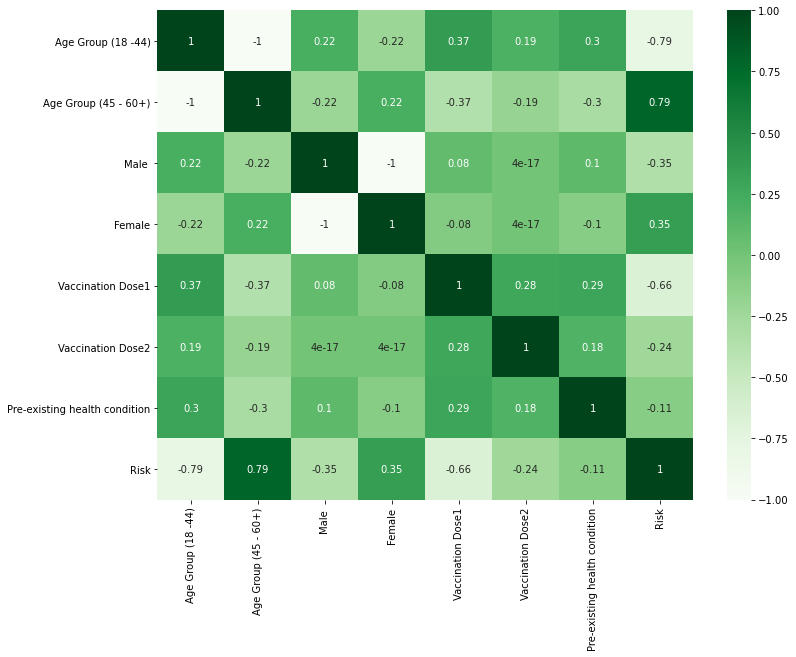

In [55]:
# Heatmap plot with values
correlation = Project.corr()
plt.figure (figsize = (12,9))
sns.heatmap(correlation, vmax=1, annot=True, linewidth=0, square=False, cmap ="Greens")
plt.show()

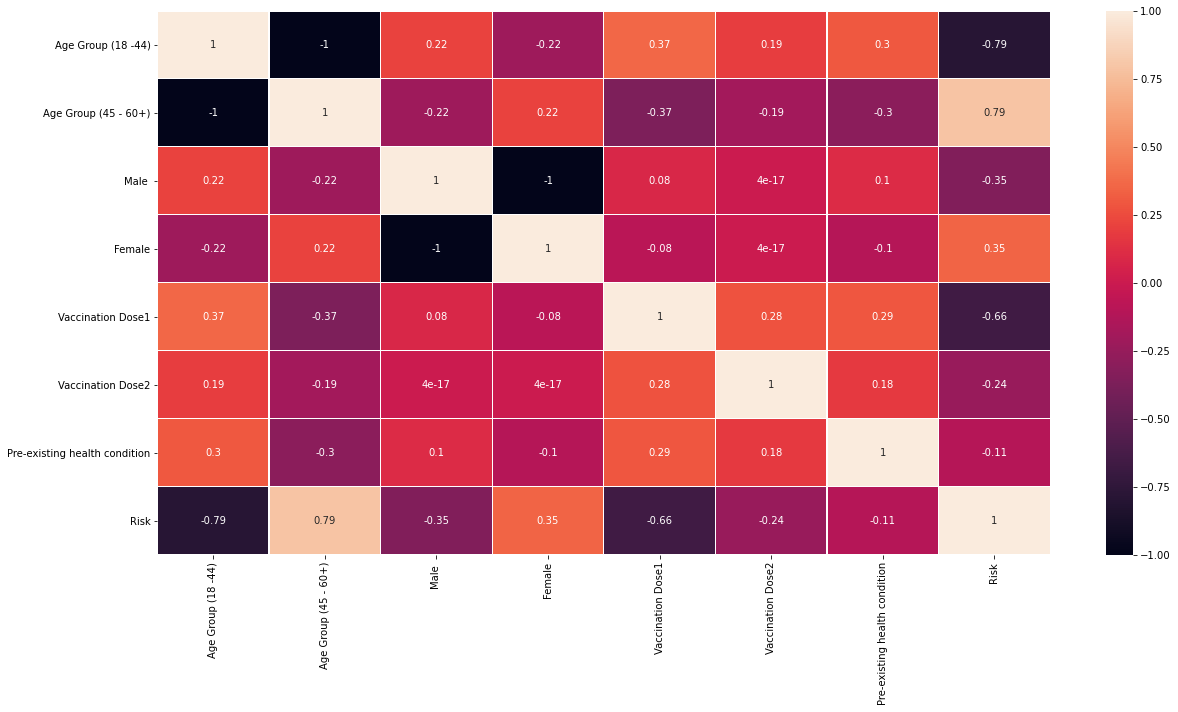

In [56]:
# Correlation heatmap for dataset

sns.heatmap(Project.corr(), annot=True, linewidth=0.2)
fig=plt.gcf()
fig.set_size_inches(20,10)
plt.show()